In [1]:
#importing libraries

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import regularizers
import os

In [ ]:
#unzipping the zip file within python
#!tar -xvf crop_part1.tar.gz

In [3]:
images = os.listdir('crop_part1')
#print(images)
#print(images[0].find('_'))

In [4]:
# finding the gender of the person based off of image name
sexList = []
s = images[0]
for i in range(len(images)):
    pic = images[i]
    ind = pic.find('_')
    sex = pic[ind+1:ind+2]
    sexList.append(sex)

#print(sexList)

In [5]:
#converting strings to integers

def str_list_to_int_list(str_list):
    int_list = [int(n) for n in str_list]
    return int_list
  
sexList1 = str_list_to_int_list(sexList)
#print(sexList1)

In [6]:
# Converting list to array
import numpy as np

sexList1 = np.array(sexList1)
images = np.array(images)
print(sexList1.shape, images.shape)

(9780,) (9780,)


In [9]:
# finding images and setting that list as our input
import cv2

X = []

for filename in images:
    img = cv2.imread("./crop_part1/"+filename)
    X.append(img)

In [10]:
x=np.array(X)
x=x[:5000, :, :, :]

y=sexList1[:5000]

print(x.shape, y.shape)

(5000, 200, 200, 3) (5000,)


In [11]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split( x, y, test_size=0.2, random_state=42)

xtr_sc=xtr/255
xts_sc=xts/255

print(ytr.shape, yts.shape)

(4000,) (1000,)


In [12]:
K.clear_session()

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization

model = Sequential()
model.add(Conv2D(16,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(200,200,3), name = 'convulation1'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01), name = 'convulation2'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_regularizer=regularizers.l2(0.01), name = 'convulation3'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64,activation = 'relu', kernel_regularizer=regularizers.l2(0.01), name = 'dense1') )
model.add(BatchNormalization())
model.add(Dense(64,activation = 'relu', kernel_regularizer=regularizers.l2(0.01), name = 'dense2') )
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.01), name = 'output') )

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convulation1 (Conv2D)        (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 99, 16)        64        
_________________________________________________________________
convulation2 (Conv2D)        (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
convulation3 (Conv2D)        (None, 46, 46, 128)       3

In [15]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:

hist = model.fit(xtr_sc, ytr, epochs=40, batch_size=30, validation_data=(xts_sc, yts))

Epoch 1/40
134/134 [==============================] - 280s 2s/step - loss: 2.8726 - accuracy: 0.7105 - val_loss: 1.9934 - val_accuracy: 0.5870
Epoch 2/40
134/134 [==============================] - 126s 940ms/step - loss: 1.6578 - accuracy: 0.7573 - val_loss: 1.5667 - val_accuracy: 0.6490
Epoch 3/40
134/134 [==============================] - 119s 891ms/step - loss: 1.3157 - accuracy: 0.7605 - val_loss: 1.3637 - val_accuracy: 0.6990
Epoch 4/40
134/134 [==============================] - 120s 899ms/step - loss: 1.2956 - accuracy: 0.7567 - val_loss: 1.2599 - val_accuracy: 0.7150
Epoch 5/40
134/134 [==============================] - 125s 934ms/step - loss: 1.1658 - accuracy: 0.7697 - val_loss: 1.3879 - val_accuracy: 0.6890
Epoch 6/40
134/134 [==============================] - 122s 907ms/step - loss: 1.0383 - accuracy: 0.7697 - val_loss: 1.0403 - val_accuracy: 0.7250
Epoch 7/40
134/134 [==============================] - 142s 1s/step - loss: 1.0858 - accuracy: 0.7793 - val_loss: 1.2677 - val_a

Text(0, 0.5, 'Test accuracy')

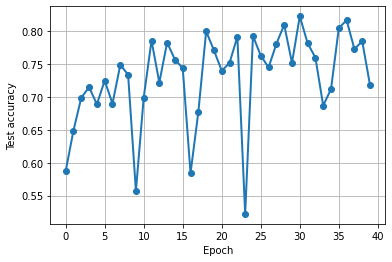

In [18]:
val_accuracy = hist.history['val_accuracy']

plt.plot(val_accuracy, 'o-', linewidth=2)
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')

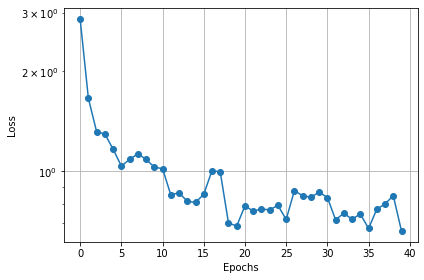

In [19]:
loss = hist.history['loss']
plt.semilogy(loss, 'o-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.tight_layout()

Gender is:  [[1.]]


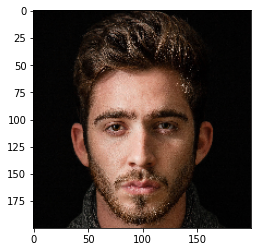

In [24]:
# Albert Dera

from skimage import io

img=io.imread('albert-dera-ILip77SbmOE-unsplash.jpg')
img=cv2.resize(img, (200,200))

img = np.array(img)
plt.imshow(img)
img=img.reshape(1, 200,200, 3)

print('Gender is: ', model.predict(img))